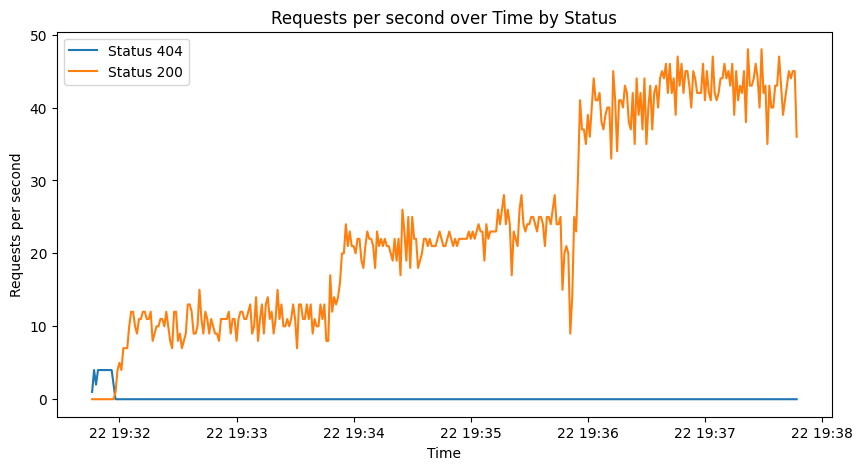

In [19]:
import csv
from collections import defaultdict
from itertools import chain
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

# get all files in the results folder
# sort them by timestamp
# get the last one

files = os.listdir("results")
files.sort()
filename = f"results/{files[-1]}"

responses_per_second = defaultdict(lambda: defaultdict(int))

with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile)

    # Skip the header row
    next(reader)

    for row in reader:
        timestamp_str = row[1]
        status = row[2]

        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S.%f")
        one_second_res = timestamp.replace(microsecond=0)
        responses_per_second[status][one_second_res] += 1

# Create a sorted list of unique timestamps across all status codes
all_timestamps = sorted(set(chain.from_iterable(time_counts.keys() for time_counts in responses_per_second.values())))

# Fill in zeros for missing timestamps in each status code
for status, time_counts in responses_per_second.items():
    for t in all_timestamps:
        if t not in time_counts:
            time_counts[t] = 0

plt.figure(figsize=(10, 5))

for status, time_counts in responses_per_second.items():
    timestamps = sorted(time_counts.keys())
    request_counts = [time_counts[t] for t in timestamps]
    plt.plot(timestamps, request_counts, label=f'Status {status}')

plt.xlabel('Time')
plt.ylabel('Requests per second')
plt.title('Requests per second over Time by Status')
plt.legend()
# log scale
plt.show()